# MCB111 w04 Section

## p-hacking

In [1]:
import numpy as np
from scipy.special import comb
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(2023)

**Nina Benites' Data**

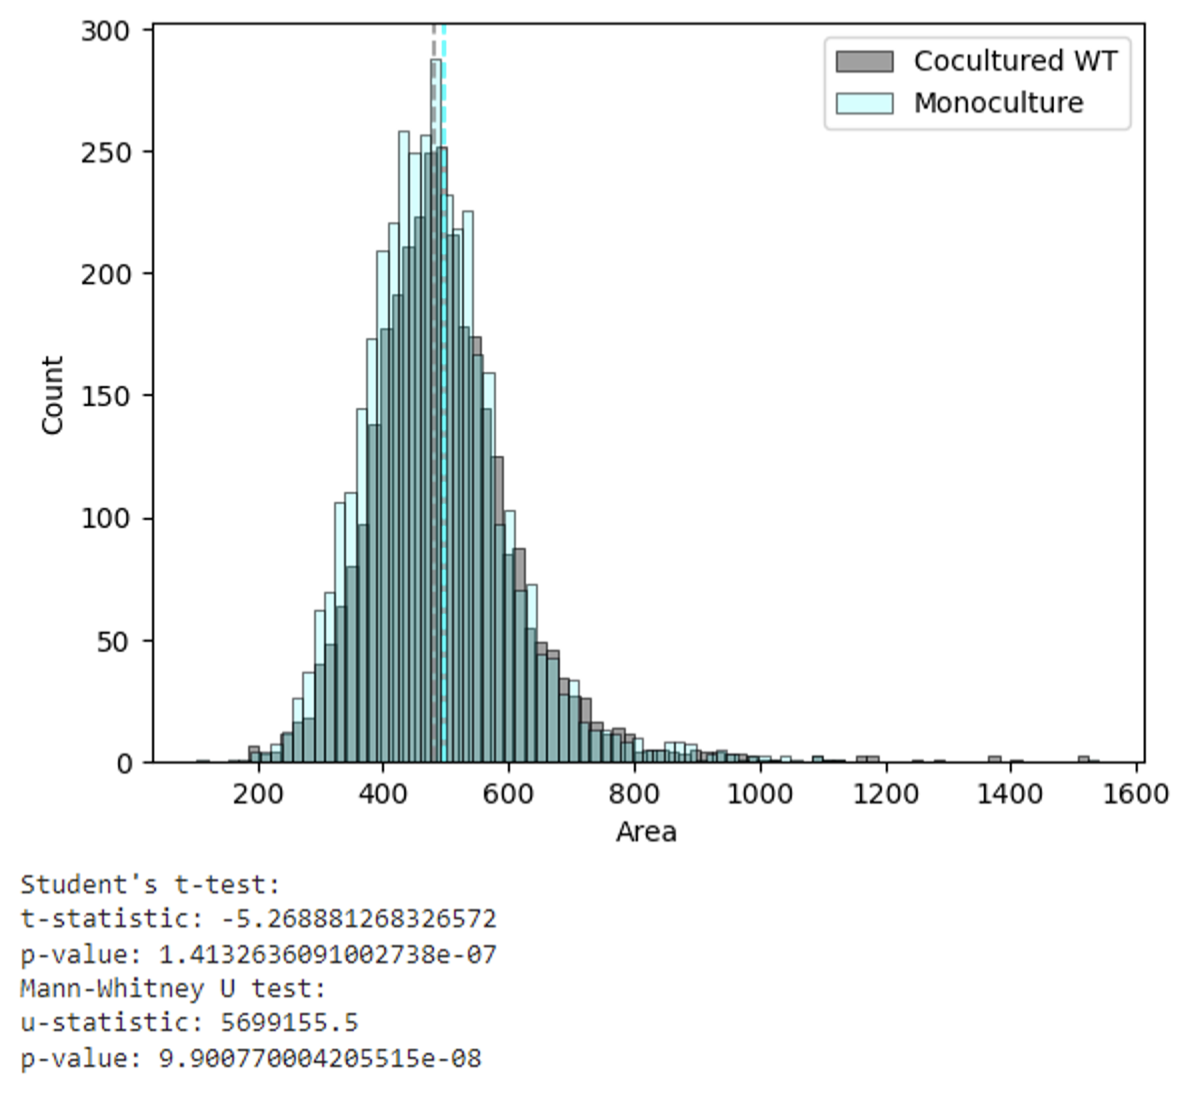

In [2]:
from IPython.display import Image
Image("Nina1.png")

https://xkcd.com/882/

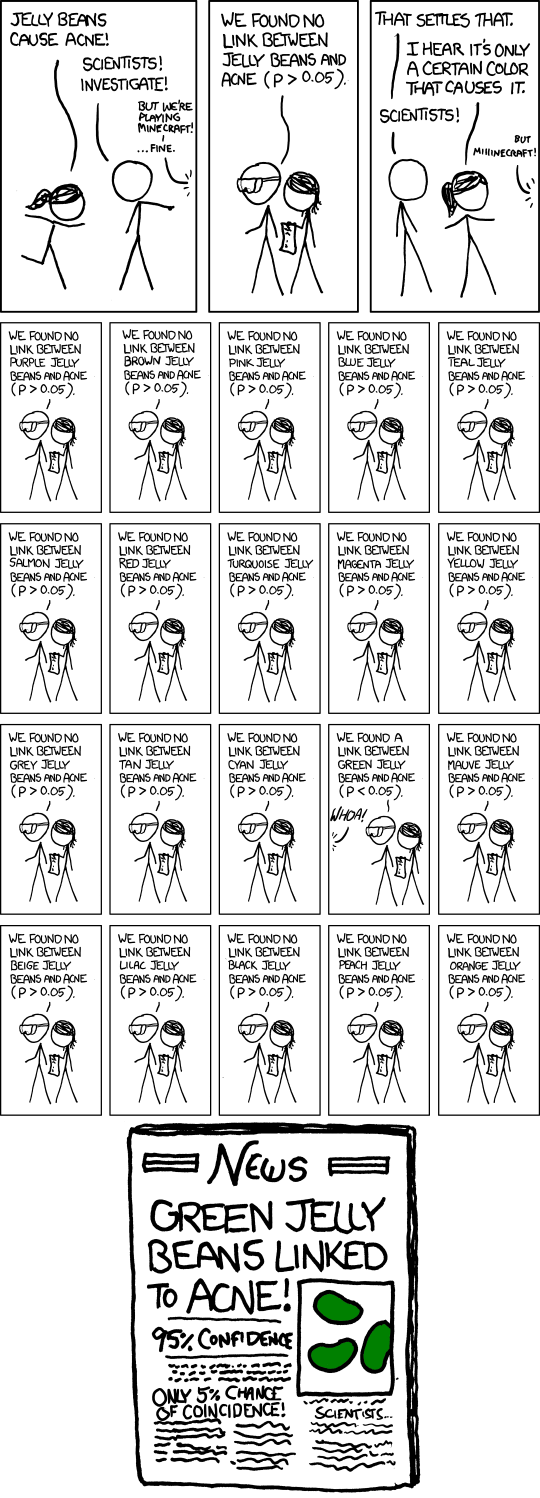

## Examples of p-Hacking:

1. Stop collecting data once $p \lt 0.05$
2. Analyze many measures, but report only those with $p \lt 0.05$
3. Collect and analyze many conditions, but only report those with $p \lt 0.05$
4. Exclude participants to get $p \lt 0.05$.
5. Increase the n in one group to get a $p \lt 0.05$.


# Hypothetical scenario

Your lab wants to develop a drug to reduce the size of tumors in a particular kind of cancer. In a sort of screening fashion, you lab is exhaustively testing compounds to find out if any of them worked. So using an animal model you measured the size of the tumors from three specimens after a certain time without any drugs and with each candidate drug. 

Below are results from one drug. 

In [2]:
def measure_tumor(group):
    
    # assume a Normal distribution for tumor size
    #
    mu    = 15
    sigma = 5
    
    # assume control and drug are drawn from same Normal distribution
    n = 3
    control = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    drug    = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    
    # Plot the n samples
    fig,ax  = plt.subplots(ncols=1,sharey=True,figsize=(3,3))
    ax.scatter([0,0,0],control)
    ax.scatter([1,1,1],drug)
    ax.set_xlim(-1,2)
    ax.set_ylim(np.min(np.concatenate((control,drug)))*0.9,
                np.max(np.concatenate((control,drug)))*1.1)
    ax.set_ylabel('Tumor size')
    ax.set_xlabel('Treatment')
    ax.set_xticks([0,1])    
    ax.set_xticklabels(['Control',group])

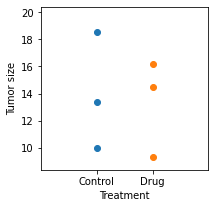

In [3]:
measure_tumor('Drug')

If we do the same for another 100 drugs: 

In [4]:
def measure_many_tumors():
    
    # assume a Normal distribution for tumor size
    #
    mu    = 15
    sigma = 5
    n     = 3
    
    fig,axs = plt.subplots(ncols=10,nrows=10,figsize=(20,20),sharey=True,sharex=True)
    axs = axs.flatten()
    
    N     = len(axs) # number of drugs
    data  = np.zeros((N,2,n))
    pvals = np.zeros(N)
    
    # assume that control and all drug treatments are identical
    for i in range(N):
        
        control = stats.norm.rvs(loc=mu,scale=sigma,size=n)
        drug    = stats.norm.rvs(loc=mu,scale=sigma,size=n)
        
        data[i,0,:] = control
        data[i,1,:] = drug
        axs[i].scatter([0,0,0],control)
        axs[i].scatter([1,1,1],drug)
        
        # get p-value from t-test
        p = stats.ttest_ind(control, drug)[1] 
        
        axs[i].set_title('p = %.3f'%p,y=0.8)
        
        # color-code the p-values
        #
        if   p < 0.01:
            axs[i].set_facecolor('orange')
        elif p < 0.05:
            axs[i].set_facecolor('yellow')
        elif p < 0.06:
            axs[i].set_facecolor('lightyellow')
        pvals[i] = p
        
    axs[-1].set_xlim(-1,2)
    axs[-1].set_xticks([0,1])
    axs[-1].set_xticklabels(['',''])
    
    fig.text(0.5,0.1,'Treatment',ha='center')
    fig.text(0.1,0.5,'Tumor size',va='center',rotation='vertical')
    return data,pvals

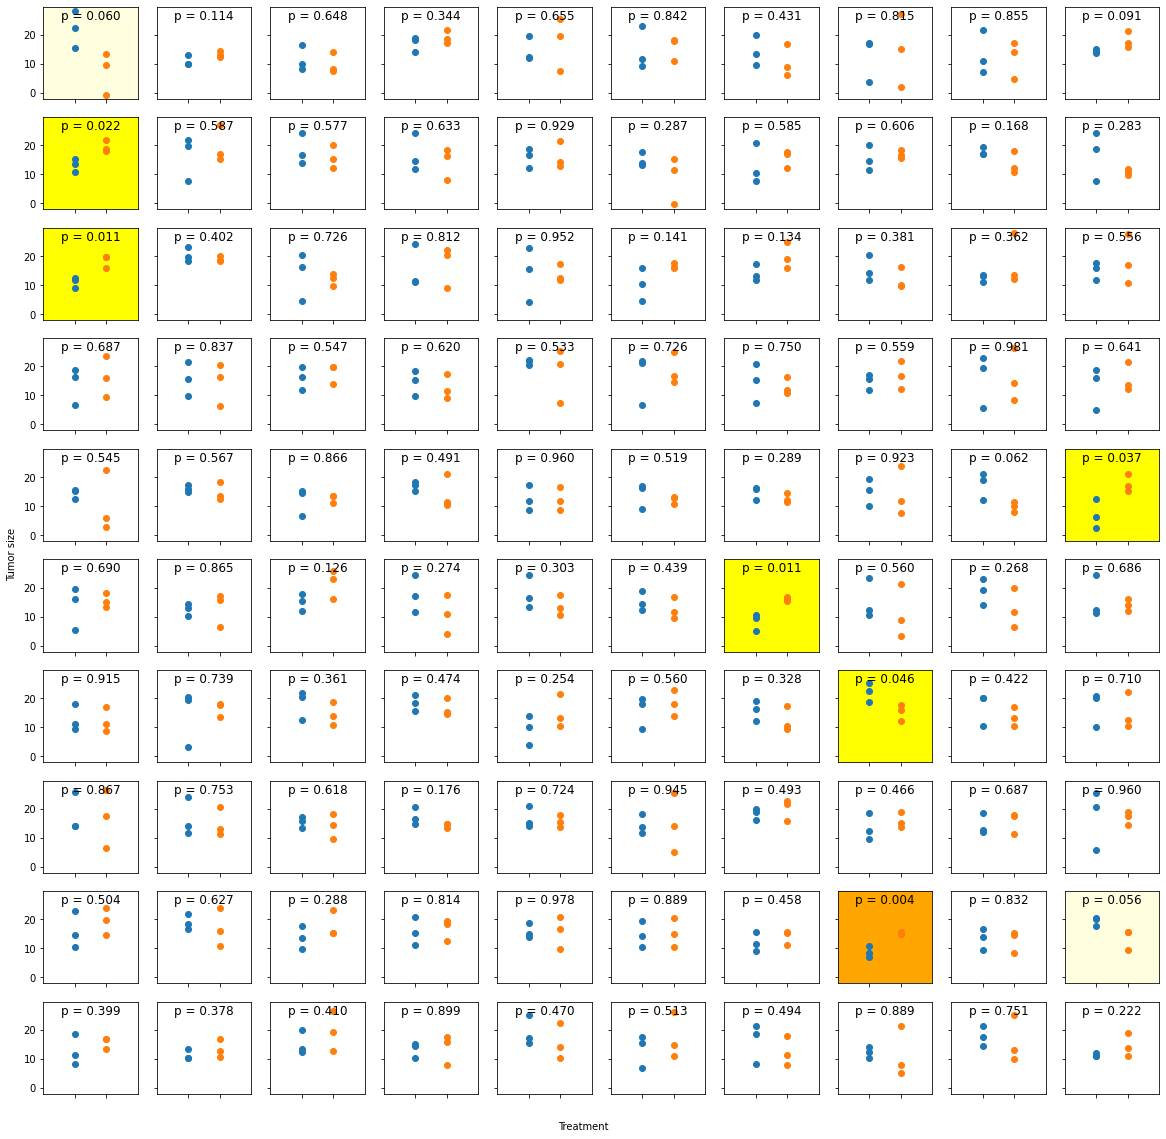

In [5]:
data_100, pvals_100 = measure_many_tumors()

We see a few drugs having "significant" p-values, even though they don't actually have any effect. BAM, we just p-hacked! p-hacking refers to the misuse and abuse of analysis techniques and results in being fooled by false positives. 

Setting the threshold for significance to 0.05 means that approximately 5% of the statistical tests we do on data gathered from the same distribution will result in false positives. 

That means if we did 100 tests we would expect about 5 false positives or 5 percent and if we did 10,000 tests we would 
expect about 500 false positives in other words the more tests we do the more false positives we have to deal with. 

If we simulate 10000 drugs, and plot the histogram of all 10000 p-values we get, we see a standard uniform distribution. Everything to the left of the $ p=0.05 $ dashed line is false positive. 

465 out of 10000 ( 0.0465 ) drugs tested have p-values < 0.05.


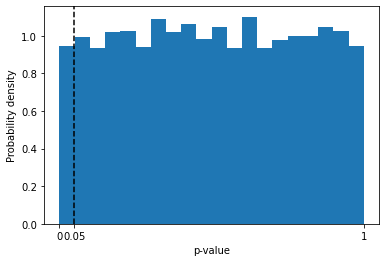

In [6]:
N = 10000   # Number of drugs

pvals = np.zeros(N)

# assume a Normal distribution for tumor size
#
mu    = 15
sigma = 5
n     = 3

for i in range(N):
    control = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    drug    = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    
    p = stats.ttest_ind(control,drug)[1]
    pvals[i] = p
    
plt.hist(pvals,bins=20,density=True)
plt.xticks((0,0.05,1),(0,0.05,1))
plt.xlabel('p-value')
plt.ylabel('Probability density')
plt.axvline(0.05,0,1.1,linestyle='--',color='k')

# how many with p-value < 0.05?
N_positive = sum(pvals<0.05)
fraction = N_positive/N

print(N_positive, 'out of', N, '(', fraction, ') drugs tested have p-values < 0.05.')

On the other hand, if drugs are truly effective, we are more likely to get $p<0.05$. 

2259 out of 10000 ( 0.2259 ) drugs tested have p-values < 0.05.


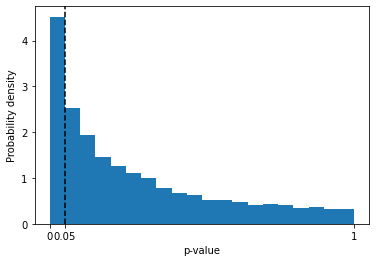

In [7]:
N = 10000   # Number of drugs

pvals = np.zeros(N)

# assume a Normal distribution for tumor size
#
mu1    = 15
sigma1 = 5
mu2    = 10
sigma2 = 3
n      = 3

for i in range(N):
    control = stats.norm.rvs(loc=mu1,scale=sigma1,size=n)
    drug    = stats.norm.rvs(loc=mu2,scale=sigma2,size=n)
    
    p = stats.ttest_ind(control,drug)[1]
    pvals[i] = p
    
plt.hist(pvals,bins=20,density=True)
plt.xticks((0,0.05,1),(0,0.05,1))
plt.xlabel('p-value')
plt.ylabel('Probability density')
plt.axvline(0.05,0,1.1,linestyle='--',color='k')

# how many with p-value < 0.05?
N_positive = sum(pvals<0.05)
fraction = N_positive/N

print(N_positive, 'out of', N, '(', fraction, ') drugs tested have p-values < 0.05.')

### A very "useful" hacking technique: Keep adding data until $p<0.05$?

Now let's talk about a slightly less obvious form of p-hacking. Remember these two groups with p-values between 0.05 and 0.06. 

In [8]:
# Find the drugs that have p-values between 0.05 and 0.06
almost_significant_index = np.where(np.logical_and(pvals_100<0.06,pvals_100>0.05))[0]
print(almost_significant_index)

[ 0 89]


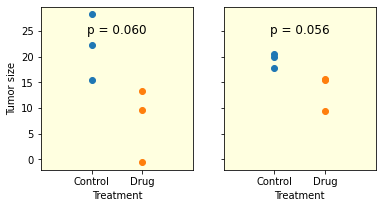

In [9]:
m = len(almost_significant_index)
fig,axs = plt.subplots(1,m,figsize=(6,3),sharey=True,sharex=True)

for i in range(m):
    idx = almost_significant_index[i]
    
    control = data_100[idx,0,:]
    drug    = data_100[idx,1,:]
    
    axs[i].scatter([0,0,0],control)
    axs[i].scatter([1,1,1],drug)
    p = pvals_100[idx]
    
    axs[i].set_title('p = %.3f'%p,y=0.8)
    axs[i].set_facecolor('lightyellow')
    axs[i].set_xlabel('Treatment')
    
axs[0].set_ylabel('Tumor size')
axs[-1].set_xlim(-1,2)
axs[-1].set_xticks([0,1])
axs[-1].set_xticklabels(['Control','Drug']);

Now we know that both groups came from the same distribution. But typically when we are doing experiments we don't know if they both came from the same distribution or different ones. And let's be honest we usually hope that the observations come from two different distributions. In this example we are looking for a new drug to help people, so we want to see an improvement. 

When we get data like this where the p-value is close to 0.05 but not less than, it is very tempting to think, hmm I wonder if the p-value will get smaller if I add more data. So we add a few more measurements to each group. 

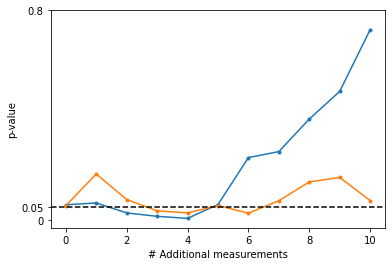

In [10]:
m = len(almost_significant_index) # cases with marginal p-value

# add more cases
n       = data_100.shape[2] # number of original cases
extra_n = 10                # number of additional cases

extra_pvals = np.zeros((m,extra_n+1))

fig,ax = plt.subplots()
for i in range(m):
    idx = almost_significant_index[i]
    
    extra_control = stats.norm.rvs(loc=mu,scale=sigma,size=extra_n)
    extra_drug    = stats.norm.rvs(loc=mu,scale=sigma,size=extra_n)
    
    control = np.append(data_100[idx,0,:],extra_control)
    drug    = np.append(data_100[idx,1,:],extra_drug)
    
    for j in range(extra_n+1):
        p = stats.ttest_ind(control[:n+j],drug[:n+j])[1]
        
        extra_pvals[i,j] = p
        
    ax.plot(np.arange(extra_n+1),extra_pvals[i],'.-')
    
ax.axhline(0.05,c='k',linestyle='--')
y_max = np.ceil(np.min((extra_pvals.max()*11,10)))/10

ax.set_yticks([0,0.05,y_max])
ax.set_yticklabels([0,0.05,y_max])
ax.set_ylabel('p-value')
ax.set_xlabel('# Additional measurements');

And now when we calculate the p-value we get something less than 0.05, so we can report a statistically significant difference. 

Hooray! We got what we wanted, right? No, we p-hacked again. 

When a p-value is close to 0.05 like what we had with the original data, there's a surprisingly high probability that adding (even just one) new measurement to both groups will result in a false positive. 

In [11]:
N = 100 # number of drugs
n = 3   # number of test per drug

pvals_after = np.zeros(N)

i = 0
while i < N:
    control = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    drug    = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    
    p = stats.ttest_ind(control, drug)[1]
    
    # if a marginal p-value, take one more measurement
    if 0.05 < p < 0.06:
        extra_control = stats.norm.rvs(loc=mu,scale=sigma,size=1)
        extra_drug    = stats.norm.rvs(loc=mu,scale=sigma,size=1)
        
        p = stats.ttest_ind(np.append(control,extra_control),np.append(drug,extra_drug))[1]
        pvals_after[i] = p
        i += 1
        
N_positive = np.sum(pvals_after < 0.05)
print('Among %i drugs with an initial p-value between 0.05 and 0.06, %i have p-values < 0.05 after just one additional measurement.'%(N,N_positive))

Among 100 drugs with an initial p-value between 0.05 and 0.06, 34 have p-values < 0.05 after just one additional measurement.


Ultimately, if sufficient data points are supplied, we could get over half of all tests with $p<0.05$, that is, false positive. 

In [12]:
N = 100   # number of drugs
n = 5000  # number of tests per drug

pvals = np.zeros((N,n-3))

for i in range(N):
    control = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    drug    = stats.norm.rvs(loc=mu,scale=sigma,size=n)
    
    for j in range(n-3):
        p = stats.ttest_ind(control[:j+3], drug[:j+3])[1]
        pvals[i,j] = p
        
N_positive = np.any(pvals < 0.05,axis=1).sum()

print('%i out of %i drugs tested have p-values < 0.05 before reaching n = %i.'%(N_positive,N,n))

57 out of 100 drugs tested have p-values < 0.05 before reaching n = 5000.


# Comparing p-values of different experiments – don’t


There is an infectious disease that if left untreated, affected people have a probability of recovery of $p_0=0.4$. Let's call this the null hypothesis $H_0$.

Your lab is testing two new treatments, treatment A (*TrA*) and treatment B (*TrB*). You run two different experiments (*expA* and *expB*) where *TrA* or *TrB* is given to two different groups of affected people.

Your analysis tells you that the p-values for the outcomes of *expA* and *expB* respect to the null hypothesis $H_0$ are

$$\begin{aligned}
\mbox{pval}(expA) &= 0.2131,\\
\mbox{pval}(expB) &= 1.05 e^{-5}.\\
\end{aligned}$$

Can we conclude that *TrB* is more effective than *TrA*? The p-value is lower! 

**No!**

Let's see a simple confounding variable that can underly this observation. Say that

- *expA* involves 15 infected people, 8 of which recovered using *TrA*
- *expB* involes 300 infected people, 157 of which recovered using *TrB*

What are the p-values under the null hypothesis of no treatment?

$$\begin{aligned}
pval(expA) &= P(\mathrm{observing~result~as~or~more~extreme~as~8~infected} \mid N=15, p_0=0.4) \\
&= \sum_{n=8}^{15} P(n \mid N = 15, p_0=0.4) \\
&= \sum_{n=8}^{15} \frac{15!}{n!(15-n)!} 0.4^n 0.6^{15-n} \\
&= 0.2131
\end{aligned}$$

$$\begin{aligned}
pval(expB) &= P(\mathrm{observing~result~as~or~more~extreme~as~157~infected} \mid N=300, p_0=0.4) \\
&= \sum_{n=157}^{300} \frac{300!}{n!(300-n)!} 0.4^n 0.6^{300-n} \\
&= 1.05e^{-5}
\end{aligned}$$

But, let's compare the effectiveness for each treatment. 

The maximum-likelihood values of the effectiveness for both treatments are given by:

$$p_A = \frac{8}{15} = 0.523$$
$$p_B = \frac{157}{300} = 0.523$$

pvalue for treatment trA = 0.21310318261043204
pvalue for treatment trB = 1.0456695561322782e-05


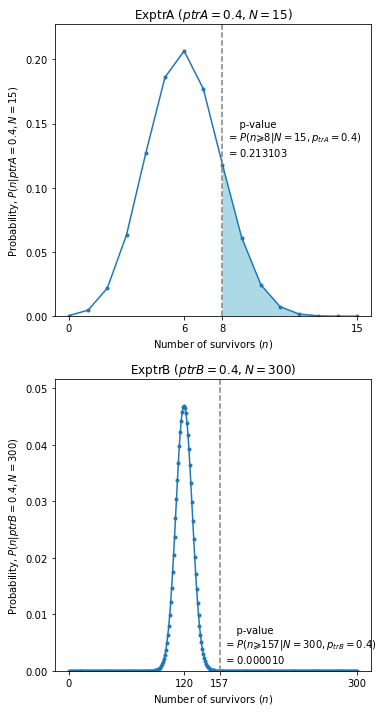

In [15]:
from matplotlib.patches import Polygon

def exp_pmf(ax,n,N,p,exp_name):
    
    # the binomial P(x,N,p)
    x = np.arange(N+1)
    y = stats.binom.pmf(x,N,p)
    
    # the p-value = P(x>=n,N,p) 
    #             = 1 - P(x<=n-1,N,p)
    #             = 1 - CDF(n-1,N,p)
    #
    pval = 1 - stats.binom.cdf(n-1,N,p)
    print("pvalue for treatment", exp_name, "=", pval)
    
    # plot
    ax.plot(x,y,'.-')    
    ax.set_title('Exp%s ($p%s=%.1f,N=%i$)'%(exp_name,exp_name,p,N))
    ax.set_ylim(0,y.max()*1.1)
    ax.set_xlabel('Number of survivors ($n$)')
    ax.set_ylabel('Probability, $P(n|p%s=%.1f,N=%i)$'%(exp_name,p,N))
    
    ix = np.arange(n,N)
    iy = stats.binom.pmf(ix,N,p)
    verts = [(n,0),*zip(ix, iy),(N,0)]
    poly  = Polygon(verts,facecolor='lightblue')
    ax.add_patch(poly)
    
    xmax = np.argmax(y)  
    ax.set_xticks([0,n,xmax,N])
    ax.set_xticklabels([0,n,xmax,N])
    ax.axvline(n,linestyle='--',c='gray')
    
    ax.text(n*1.03,stats.binom.pmf(n,N,p)+np.max(y)*0.03,
            '    p-value\n$=P(n\geqslant %i|N=%i,p_{%s}=%.1f)$\n$=%f$'%(n,N,exp_name,p,pval))

# The null distributions for trA and trB
fig,ax = plt.subplots(2,1,figsize=(5.5,10))    
exp_pmf(ax[0],   8,  15, 0.4, 'trA')
exp_pmf(ax[1], 157, 300, 0.4, 'trB')
fig.tight_layout()

So what have we seen here? These two treatments have the same effectiveness, but because the sample sizes of the experiments are so different, the null distribution for expB is much narrower than that of expA, so the p-value for expB is smaller as a result.

**You can never compare two hypotheses by looking to their p-values relative to a third null hypothesis. There are many hidden and possibly confounding variables in that calculation, one of them the sample size.**

Let's instead look at the posterior distributions for the two experiments, as done before in week 2:

$$\begin{aligned}
P(p_A\mid expA) &=   \frac{16!} {8! 7!}\,  p_A^{8} (1-p_A)^{7}\\
P(p_B\mid expB) &=   \frac{301!}{157! 143!}\, p_B^{157} (1-p_B)^{143} \\
\end{aligned}$$

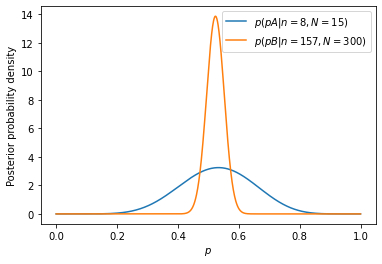

In [14]:
p = np.arange(0,1.001,0.001)

fig,ax = plt.subplots()

ax.plot(p, 16*stats.binom.pmf(8,15,p),   label='$p(pA|n=8,N=15)$')
ax.plot(p,301*stats.binom.pmf(157,300,p),label='$p(pB|n=157,N=300)$')
ax.set_xlabel('$p$')
ax.set_ylabel('Posterior probability density')
ax.legend();

These posteriors are compatible with both treatments having the same effectiveness, as they are both centered around the same value, but the estimate of $p_B$ is more precise than that of $p_A$ because there *expB* had much more data.

As we did in the homework of w02, you remember that when the data follows a binomial distribution, the best estimate of the Bernoulli parameter p and its confidence value are given by

$$
\begin{equation}
p^\ast  = \frac{n}{N} \quad \sigma = \sqrt{\frac{p^\ast(1-p^\ast)}{N}}.
\end{equation}
$$

The best estimates and confidence values for the effectiveness of the two treatments are

$$
\begin{aligned}
p_A &\approx 0.523 \pm 0.129\\
p_B &\approx 0.523 \pm 0.029.
\end{aligned}
$$
In fact, if the two experiments had been run with using the same treatment, you would have obtained one “significant” p-value and one “non significant” p-value just because of the different sample size.

**Never compare p-values of different experiments**

**Also Nina's data**

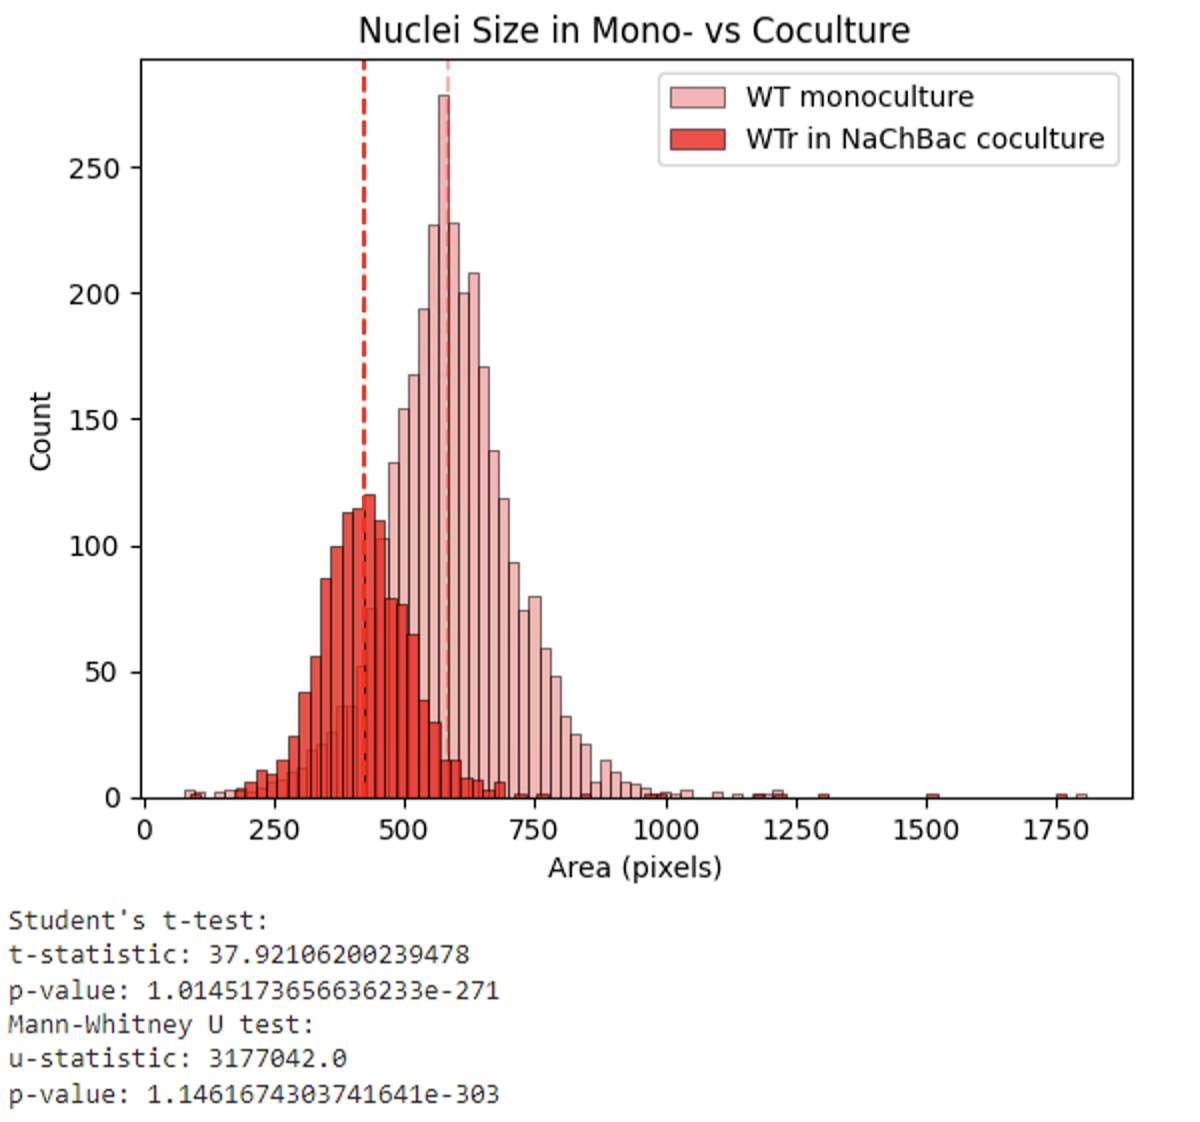

In [3]:
from IPython.display import Image
Image("Nina2.png")

**From Nina: "Here's an example where I'm thinking... hmmmm maybe the means really are different."**

Which Area value will you use to select "WTr in NAChBac coculture" and what would be your expected number of False positives?